In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv('daily_sales_1002.csv', encoding='ISO-8859-1', dtype={'article':'str','article_text':'str', 'sales_profit': 'float'})
df.head()

,calendar_day,article,article_text,sales_org,sales_profit,sales_profit_currency,quantity,sales_excluding_tax,cost
0,20210108,000000000001646463,SHE Terry 105x200x40cm grey KRONBORG,1002,821.47,SEK,8.0,1184.0,362.53
1,20201209,000000000003253632,MA 90x200cm PLUS B80 Grey-27 DREAMZONE,1002,12646.59,SEK,9.0,26160.0,13513.41
2,20210427,000000000003250323,MA 80x200cm PLUS F65 DREAMZONE,1002,6262.78,SEK,12.0,11040.0,4777.22
3,20210702,000000000002508340,BM FAGERSTA 70x120cm black,1002,36.16,SEK,1.0,80.0,43.84
4,20210616,000000000004921500,Storage box SMARTSTORE classic 45 w/lid,1002,5253.41,SEK,82.0,9734.4,4480.99


Distribution of the values

array([[<AxesSubplot:title={'center':'calendar_day'}>,
        <AxesSubplot:title={'center':'sales_org'}>],
       [<AxesSubplot:title={'center':'sales_profit'}>,
        <AxesSubplot:title={'center':'quantity'}>],
       [<AxesSubplot:title={'center':'sales_excluding_tax'}>,
        <AxesSubplot:title={'center':'cost'}>]], dtype=object)

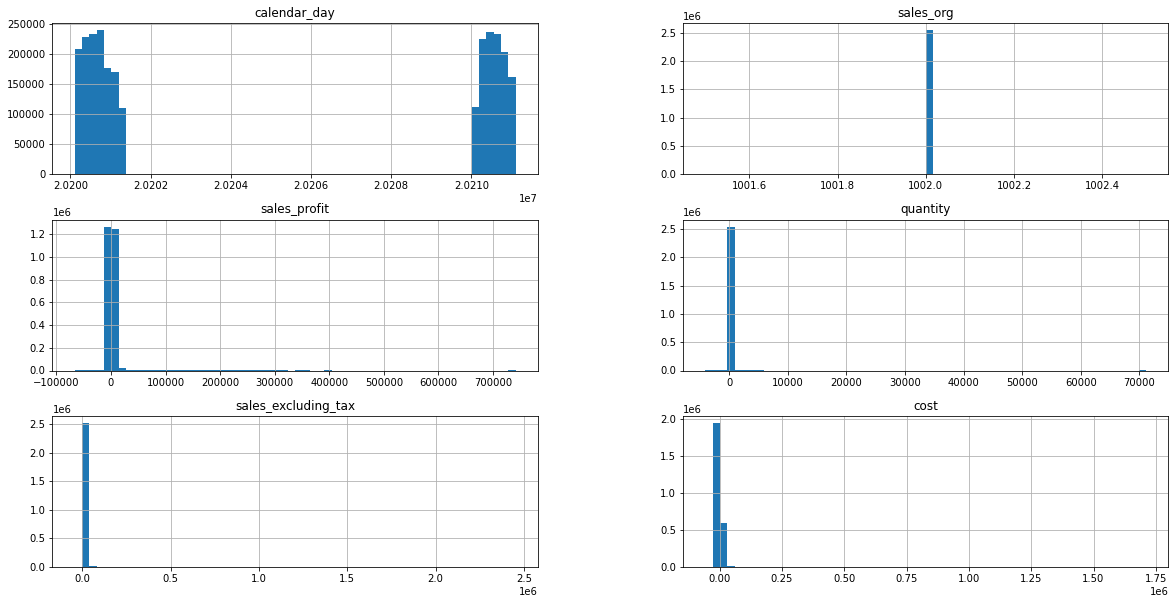

In [5]:
df.hist(bins = 60,figsize = (20,10))

## Data Exploration 

In [6]:
df['article_text'].value_counts()

Fittings                                    9262
TT FLEKKMURE 50x70 3pcs/pk ass.             1465
COA SVARTOR 135cm jacq. grey                1298
MP 90x200cm PLUS T40 DREAMZONE              1229
Tealights PIEREY 100pcs/pk                  1209
                                            ... 
CUR BYRE 1x140x245 natural                     1
MA 90x200cm TEMPRAKON Box                      1
String curtain NISSER 90x245 cream plain       1
Tealightholder as a tree 4 cups                1
CUR STORFOSNA 1x145x245 coral                  1
Name: article_text, Length: 9946, dtype: int64

<AxesSubplot:>

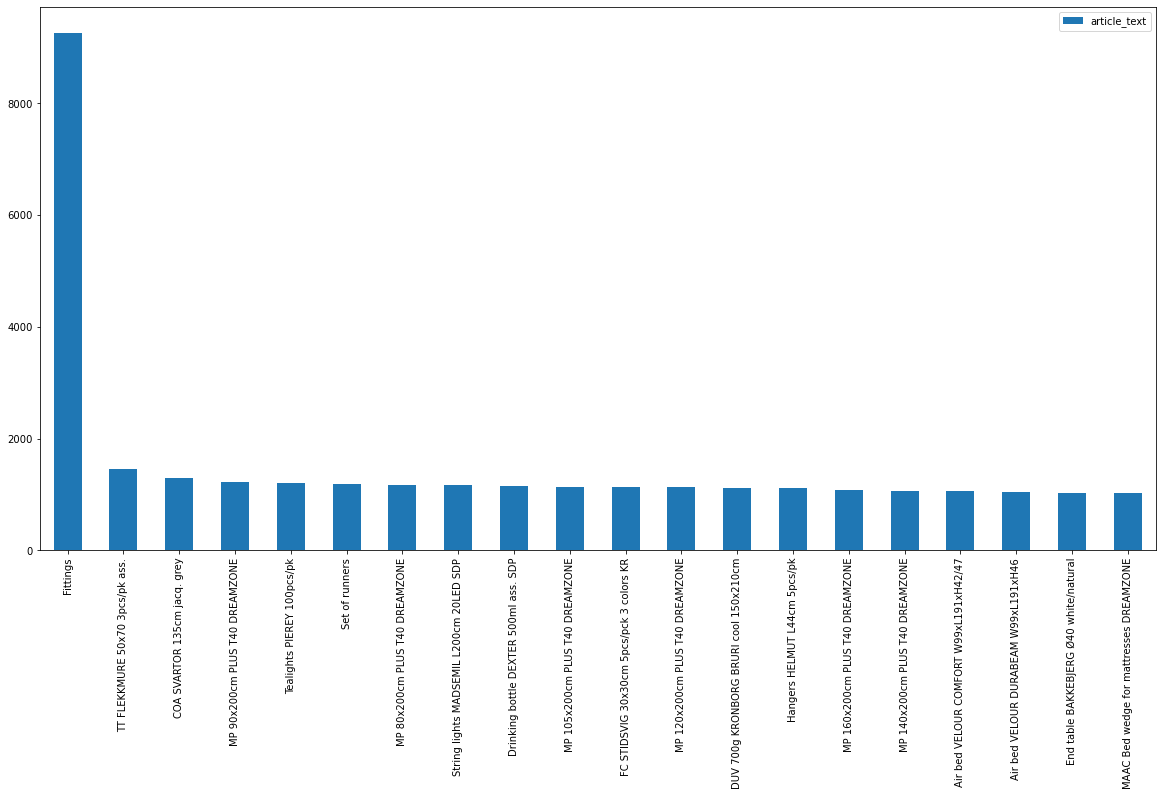

In [7]:
pd.DataFrame(df['article_text'].value_counts().head(20)).plot(kind = 'bar', figsize = (20,10))

<AxesSubplot:>

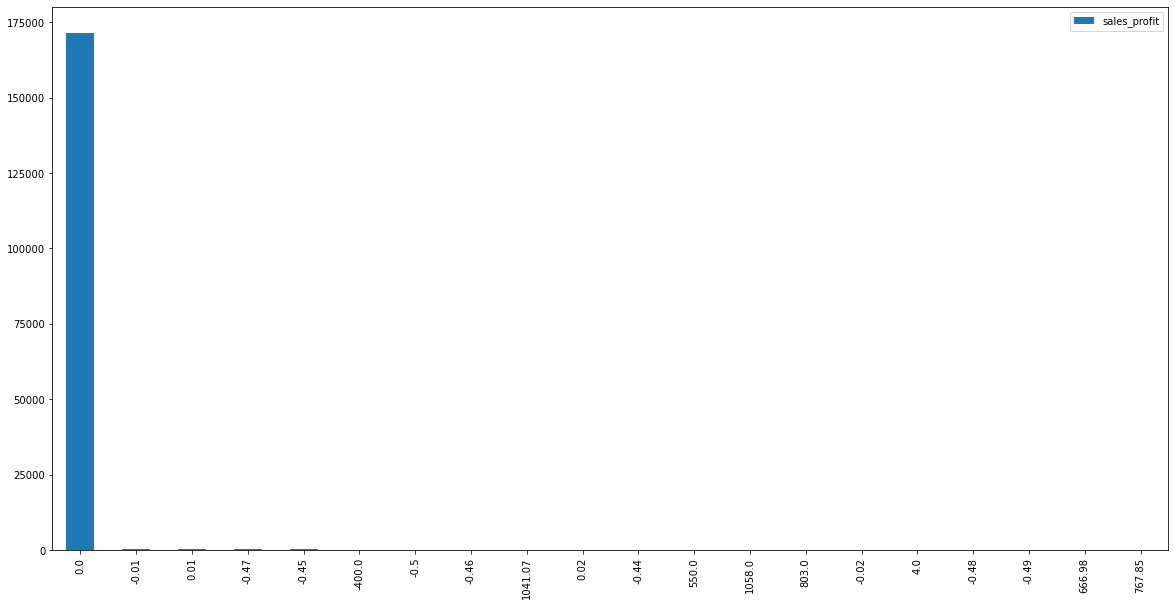

In [386]:
pd.DataFrame(df['sales_profit'].value_counts().head(20)).plot(kind = 'bar', figsize = (20,10))

<AxesSubplot:>

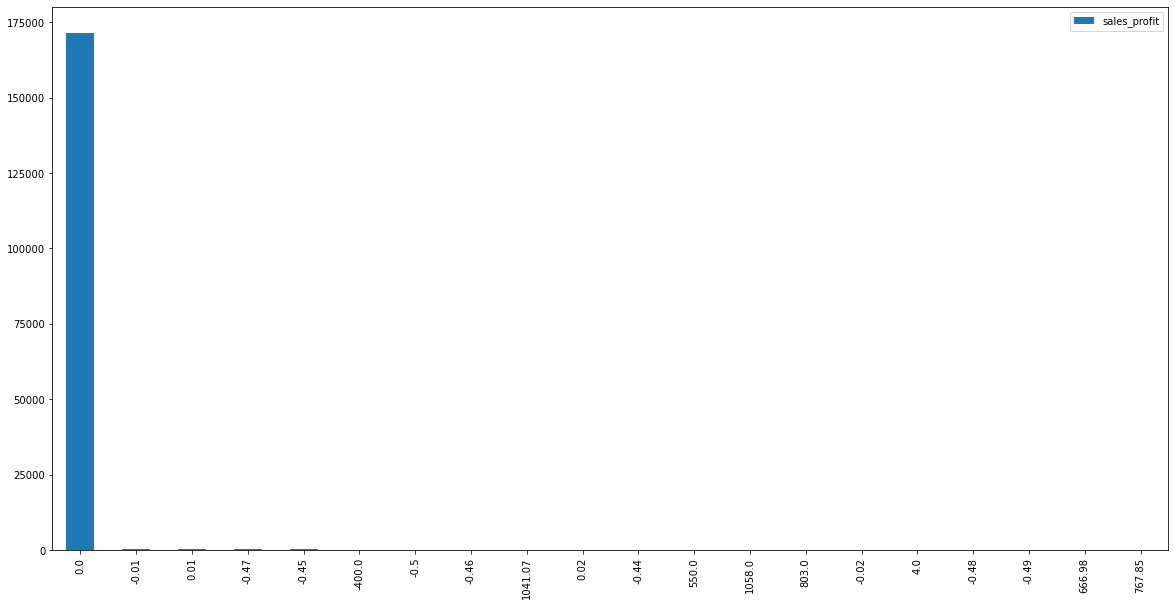

In [387]:
pd.DataFrame(df['sales_profit'].value_counts().head(20)).plot(kind = 'bar', figsize = (20,10))

## Data Wrangling

In [388]:
df.describe()

,calendar_day,sales_org,sales_profit,quantity,sales_excluding_tax,cost
count,2.544735e+06,2544735.0,2.544735e+06,2.544735e+06,2.544735e+06,2.544735e+06
mean,2.020525e+07,1002.0,1.607778e+03,1.855051e+01,2.857790e+03,1.250012e+03
std,4.946806e+03,0.0,4.324751e+03,6.883381e+01,8.066016e+03,4.149701e+03
min,2.020010e+07,1002.0,-6.675900e+04,-4.059000e+03,-4.452935e+04,-5.788395e+04
25%,2.020062e+07,1002.0,1.452000e+02,2.000000e+00,2.880000e+02,1.003100e+02
50%,2.020120e+07,1002.0,5.958700e+02,6.000000e+00,9.928000e+02,3.445400e+02
75%,2.021052e+07,1002.0,1.578530e+03,1.800000e+01,2.640000e+03,1.023545e+03
max,2.021110e+07,1002.0,7.414514e+05,7.117700e+04,2.453447e+06,1.711996e+06


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544735 entries, 0 to 2544734
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   calendar_day           int64  
 1   article                object 
 2   article_text           object 
 3   sales_org              int64  
 4   sales_profit           float64
 5   sales_profit_currency  object 
 6   quantity               float64
 7   sales_excluding_tax    float64
 8   cost                   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 174.7+ MB


In [9]:
df.nunique()

calendar_day                675
article                   12697
article_text               9946
sales_org                     1
sales_profit             575169
sales_profit_currency         1
quantity                   4646
sales_excluding_tax      158990
cost                     456470
dtype: int64

In [10]:
df.duplicated().sum()

0

## Data Cleaning

In [11]:
df.isnull().sum()

calendar_day             0
article                  0
article_text             0
sales_org                0
sales_profit             0
sales_profit_currency    0
quantity                 0
sales_excluding_tax      0
cost                     0
dtype: int64

## Convert 'calender_day' int to date time format.

In [12]:
df['calendar_day'] = pd.to_datetime(df['calendar_day'], format='%Y%m%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544735 entries, 0 to 2544734
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   calendar_day           datetime64[ns]
 1   article                object        
 2   article_text           object        
 3   sales_org              int64         
 4   sales_profit           float64       
 5   sales_profit_currency  object        
 6   quantity               float64       
 7   sales_excluding_tax    float64       
 8   cost                   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 174.7+ MB


In [13]:
df['calendar_day'].min()

Timestamp('2020-01-01 00:00:00')

In [14]:
df['calendar_day'].max()

Timestamp('2021-11-05 00:00:00')

## Create a new column to store months.

In [15]:
df['month'] = df['calendar_day'].dt.month
df.head(3)

,calendar_day,article,article_text,sales_org,sales_profit,sales_profit_currency,quantity,sales_excluding_tax,cost,month
0,2021-01-08,000000000001646463,SHE Terry 105x200x40cm grey KRONBORG,1002,821.47,SEK,8.0,1184.0,362.53,1
1,2020-12-09,000000000003253632,MA 90x200cm PLUS B80 Grey-27 DREAMZONE,1002,12646.59,SEK,9.0,26160.0,13513.41,12
2,2021-04-27,000000000003250323,MA 80x200cm PLUS F65 DREAMZONE,1002,6262.78,SEK,12.0,11040.0,4777.22,4


## New Dataset for Monthly Sales

In [16]:
monthly_sales = df[['article_text','sales_profit',
       'quantity', 'sales_excluding_tax','month']]
monthly_sales.head()

,article_text,sales_profit,quantity,sales_excluding_tax,month
0,SHE Terry 105x200x40cm grey KRONBORG,821.47,8.0,1184.0,1
1,MA 90x200cm PLUS B80 Grey-27 DREAMZONE,12646.59,9.0,26160.0,12
2,MA 80x200cm PLUS F65 DREAMZONE,6262.78,12.0,11040.0,4
3,BM FAGERSTA 70x120cm black,36.16,1.0,80.0,7
4,Storage box SMARTSTORE classic 45 w/lid,5253.41,82.0,9734.4,6


<AxesSubplot:xlabel='article_text', ylabel='sales_profit'>

C:\Users\pralo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pralo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


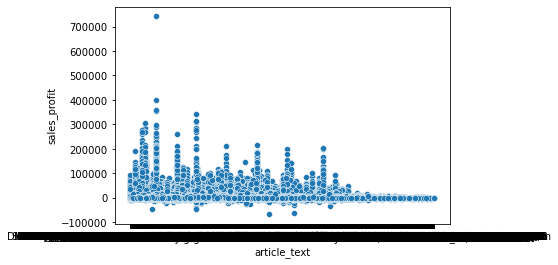

In [17]:
sns.scatterplot(x="article_text", y="sales_profit", data=df) #continues data

 What is the overall Sales Trend?¶


In [69]:
df_trend = monthly_sales.groupby('month').sum()['sales_excluding_tax'].reset_index()
df_trend.apply(lambda s: s.apply('{0:.2f}'.format))

,month,sales_excluding_tax
0,1.00,527895865.62
1,2.00,408030661.42
2,3.00,622544116.66
3,4.00,767237935.06
4,5.00,839575254.52
5,6.00,825303706.11
6,7.00,747133321.18
7,8.00,655303263.98
8,9.00,600232607.13
9,10.00,604353359.16


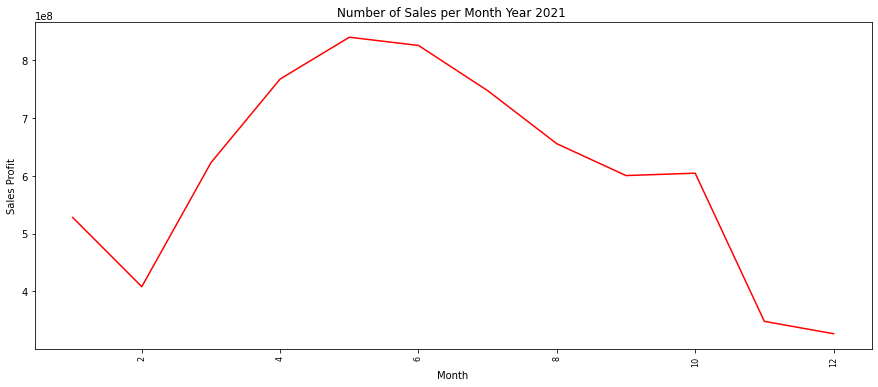

In [70]:
plt.figure(figsize = (15,6))
plt.plot(df_trend['month'],df_trend['sales_excluding_tax'], color = 'red')
plt.title('Number of Sales per Month Year 2021 ')
plt.xlabel('Month')
plt.ylabel('Sales Profit')
plt.xticks(rotation = 'vertical', size = 8)
plt.show()
          

In [18]:
product_group = df.groupby('article_text')
product_group.sales_excluding_tax.sum().nlargest(10)

article_text
Lounge set ULLEHUSE 6 pers. black         58866498.00
Transport                                 37049576.68
Lounge set TAMBOHUSE 5 pers. grey         37009092.18
Sofa bed chaiselongue VEJLBY dark grey    33888022.30
Lounge set VONGE 5 pers. black            32942864.73
PIL 800g Høie DOWNFEEL 50x60cm            30777806.15
PIL 650g Varnamo KEISAREN 50x60cm         28766862.32
DUV 7 kg CURA PEARL 150x210cm             25621400.36
TM 180x200cm GOLD T65 white/light grey    25329457.31
Recliner chair STORD grey                 24706191.05
Name: sales_excluding_tax, dtype: float64

In [19]:
mask = df['article_text'] == 'Front of drawer'

In [20]:
prod1 = df.loc[df['article_text'] == 'Lounge set ULLEHUSE 6 pers. black'] 
prod1.head()       

,calendar_day,article,article_text,sales_org,sales_profit,sales_profit_currency,quantity,sales_excluding_tax,cost,month
941,2020-04-17,000000000003782210,Lounge set ULLEHUSE 6 pers. black,1002,1580.33,SEK,1.0,3600.00,2019.67,4
7079,2021-06-21,000000000003700004,Lounge set ULLEHUSE 6 pers. black,1002,119804.81,SEK,46.0,195040.82,75236.01,6
10104,2021-05-16,000000000003700004,Lounge set ULLEHUSE 6 pers. black,1002,108847.91,SEK,51.0,193440.00,84592.09,5
11800,2021-03-08,000000000003700004,Lounge set ULLEHUSE 6 pers. black,1002,31338.31,SEK,10.0,48000.00,16661.69,3
19878,2021-08-27,000000000003700004,Lounge set ULLEHUSE 6 pers. black,1002,25141.61,SEK,16.0,51200.01,26058.40,8


In [21]:
prod1 = prod1.groupby('month').sum()['sales_excluding_tax'].reset_index()

In [22]:
prod1 = prod1.rename(columns = {'sales_excluding_tax':'Lounge set ULLEHUSE 6 pers. black'})
prod1

,month,Lounge set ULLEHUSE 6 pers. black
0,1,125198.40
1,2,233929.73
2,3,9315763.54
3,4,19572876.67
4,5,12437521.41
5,6,4995113.67
6,7,3322973.21
7,8,7177070.11
8,9,1552404.86
9,10,128046.40


In [23]:
prod2 = df.loc[df['article_text'] == 'Lounge set TAMBOHUSE 5 pers. grey'] 
prod2

,calendar_day,article,article_text,sales_org,sales_profit,sales_profit_currency,quantity,sales_excluding_tax,cost,month
523,2020-02-16,000000000003778042,Lounge set TAMBOHUSE 5 pers. grey,1002,0.00,SEK,0.0,0.00,0.00,2
2076,2020-07-29,000000000003778042,Lounge set TAMBOHUSE 5 pers. grey,1002,0.00,SEK,0.0,0.00,0.00,7
22165,2021-05-04,000000000003778042,Lounge set TAMBOHUSE 5 pers. grey,1002,29428.83,SEK,7.0,67600.00,38171.17,5
36889,2021-07-27,000000000003778042,Lounge set TAMBOHUSE 5 pers. grey,1002,17852.71,SEK,2.0,28080.00,10227.29,7
39450,2020-05-23,000000000003778042,Lounge set TAMBOHUSE 5 pers. grey,1002,28797.47,SEK,5.0,57600.00,28802.53,5
...,...,...,...,...,...,...,...,...,...,...
2481422,2020-05-31,000000000003778042,Lounge set TAMBOHUSE 5 pers. grey,1002,23458.60,SEK,4.0,47200.01,23741.41,5
2485446,2021-06-01,000000000003778042,Lounge set TAMBOHUSE 5 pers. grey,1002,31109.54,SEK,5.0,57359.99,26250.45,6
2498339,2021-03-23,000000000003778042,Lounge set TAMBOHUSE 5 pers. grey,1002,61124.51,SEK,11.0,118482.39,57357.88,3
2498495,2021-07-10,000000000003778042,Lounge set TAMBOHUSE 5 pers. grey,1002,36261.73,SEK,4.0,56799.20,20537.47,7


In [24]:
prod2 = prod2.groupby('month').sum()['sales_excluding_tax'].reset_index()
prod2 = prod2.rename(columns = {'sales_excluding_tax':'Lounge set TAMBOHUSE 5 pers. grey'})
prod2

,month,Lounge set TAMBOHUSE 5 pers. grey
0,1,0.00
1,2,64282.34
2,3,4899826.55
3,4,6524325.21
4,5,11766792.38
5,6,7713878.53
6,7,3461508.81
7,8,2501863.64
8,9,21200.00
9,10,-16585.28


In [25]:
prod3 = df.loc[df['article_text'] == 'Sofa bed chaiselongue VEJLBY dark grey']

In [26]:
prod3 = prod3.groupby('month').sum()['sales_excluding_tax'].reset_index()
prod3 = prod3.rename(columns = {'sales_excluding_tax':'Sofa bed chaiselongue VEJLBY dark grey'})

In [27]:
prod3

,month,Sofa bed chaiselongue VEJLBY dark grey
0,1,2952044.71
1,2,2375190.84
2,3,3216231.16
3,4,2701323.21
4,5,3174653.61
5,6,3333557.92
6,7,3662846.69
7,8,2682401.07
8,9,3409308.78
9,10,3057496.77


In [28]:
prod2_var = prod2['Lounge set TAMBOHUSE 5 pers. grey']
prod3_var = prod3['Sofa bed chaiselongue VEJLBY dark grey']
display(prod2_var)
display(prod3_var)

0            0.00
1        64282.34
2      4899826.55
3      6524325.21
4     11766792.38
5      7713878.53
6      3461508.81
7      2501863.64
8        21200.00
9       -16585.28
10       72000.00
Name: Lounge set TAMBOHUSE 5 pers. grey, dtype: float64

0     2952044.71
1     2375190.84
2     3216231.16
3     2701323.21
4     3174653.61
5     3333557.92
6     3662846.69
7     2682401.07
8     3409308.78
9     3057496.77
10    1830029.88
11    1492937.66
Name: Sofa bed chaiselongue VEJLBY dark grey, dtype: float64

In [29]:
prod1.insert(2, 'Lounge set TAMBOHUSE 5 pers. grey', prod2_var)
prod1.insert(3, 'Sofa bed chaiselongue VEJLBY dark grey', prod3_var )

In [30]:
prod1.head(2)

,month,Lounge set ULLEHUSE 6 pers. black,Lounge set TAMBOHUSE 5 pers. grey,Sofa bed chaiselongue VEJLBY dark grey
0,1,125198.40,0.00,2952044.71
1,2,233929.73,64282.34,2375190.84


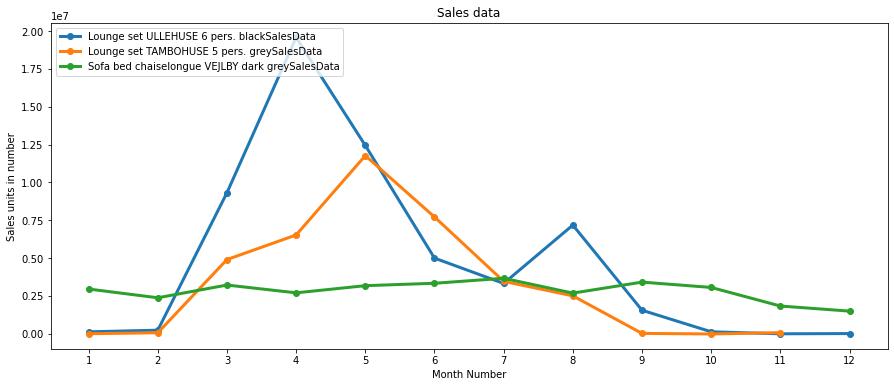

In [31]:
plt.figure(figsize = (15,6))

monthList = prod1['month'].tolist()
LoungeULLEHUSEblackSalesData = prod1['Lounge set ULLEHUSE 6 pers. black'].tolist()
LoungeTAMBOHUSEgreySalesData = prod1['Lounge set TAMBOHUSE 5 pers. grey'].tolist()
SofabedSalesData = prod1['Sofa bed chaiselongue VEJLBY dark grey'].tolist()

plt.plot(monthList, LoungeULLEHUSEblackSalesData  ,   label = 'Lounge set ULLEHUSE 6 pers. blackSalesData', marker='o', linewidth=3)
plt.plot(monthList, LoungeTAMBOHUSEgreySalesData , label = 'Lounge set TAMBOHUSE 5 pers. greySalesData', marker='o', linewidth=3)
plt.plot(monthList, SofabedSalesData, label = 'Sofa bed chaiselongue VEJLBY dark greySalesData', marker='o', linewidth=3)

plt.xlabel('Month Number')
plt.ylabel('Sales units in number')
plt.legend(loc='upper left')
plt.xticks(monthList)
#plt.yticks([50000.00, 500000.00, 1000000.00, 3000000.00 ,10000000.00, 15000000.00])
plt.title('Sales data')
plt.show()

In [71]:

df_trend


,month,sales_excluding_tax
0,1,5.278959e+08
1,2,4.080307e+08
2,3,6.225441e+08
3,4,7.672379e+08
4,5,8.395753e+08
5,6,8.253037e+08
6,7,7.471333e+08
7,8,6.553033e+08
8,9,6.002326e+08
9,10,6.043534e+08


In [72]:
df_trend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                12 non-null     int64  
 1   sales_excluding_tax  12 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 320.0 bytes


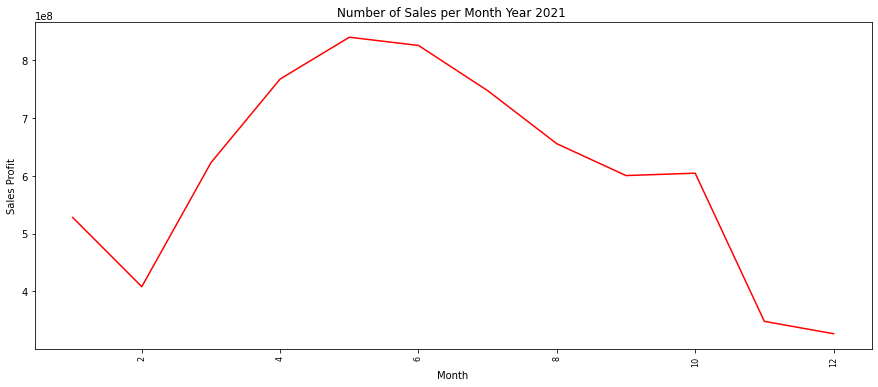

In [73]:
plt.figure(figsize = (15,6))
plt.plot(df_trend['month'],df_trend['sales_excluding_tax'], color = 'red')
plt.title('Number of Sales per Month Year 2021 ')
plt.xlabel('Month')
plt.ylabel('Sales Profit')
plt.xticks(rotation = 'vertical', size = 8)
plt.show()

In [78]:
*plt.figure(figsize = (50,50))
g = sns.FacetGrid(df_trend, col='article_text',height=6.5, aspect=0.85)
g.map(sns.histplot, "sales_excluding_tax")

SyntaxError: can't use starred expression here (Temp/ipykernel_20660/3990911348.py, line 1)

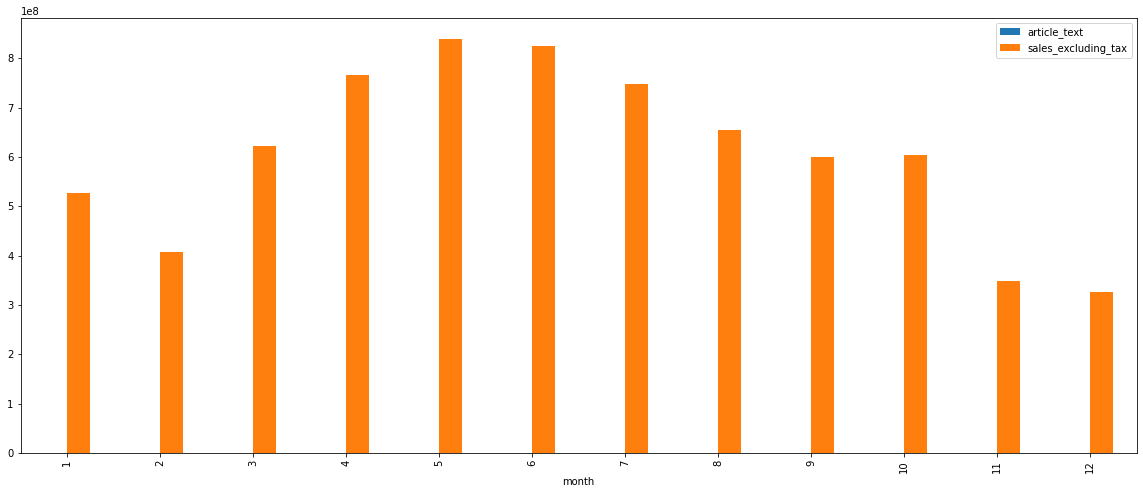

In [76]:
df_res = pd.DataFrame(df_trend, columns=["month", "sales_excluding_tax", "article_text"])
 
# plot the dataframe
df_res.plot(x="month", y=["article_text", "sales_excluding_tax"], kind="bar", figsize=(20, 8))
 
# print bar graph
plt.show()

In [66]:
import pandas as pd
import matplotlib.pyplot as mp

data = result.groupby(['article_text','month']).sum()['sales_excluding_tax'].reset_index()

# form dataframe
data = data.head()

df = pd.DataFrame(data, columns=["article_text", "sales_excluding_tax", "month"])

# plot the dataframe
df.plot(x="article_text", y=["month", "sales_excluding_tax"], kind="bar", figsize=(20, 8))

# print bar graph
mp.show()


NameError: name 'result' is not defined

In [39]:
df.groupby('month').sum()

,sales_org,sales_profit,quantity,sales_excluding_tax,cost
month,,,,,
1,219593310,2.843681e+08,3736215.02,5.278959e+08,2.435278e+08
2,205471122,2.338894e+08,2655589.02,4.080307e+08,1.741413e+08
3,236896848,3.472077e+08,3833185.91,6.225441e+08,2.753365e+08
4,232916904,4.284362e+08,4276843.44,7.672379e+08,3.388017e+08
5,241953942,4.779493e+08,4683091.31,8.395753e+08,3.616259e+08
6,227858808,4.666221e+08,5054365.51,8.253037e+08,3.586816e+08
7,241736508,4.234039e+08,5038841.18,7.471333e+08,3.237294e+08
8,241556148,3.587883e+08,4369065.54,6.553033e+08,2.965149e+08
9,229161408,3.396590e+08,4120314.07,6.002326e+08,2.605736e+08


## What was the best month for sales?

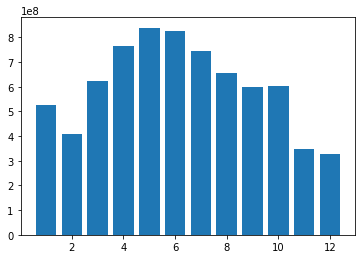

In [60]:
months = range(1,13)
results = df.groupby('month').sum()
plt.bar(months, results['sales_excluding_tax'])
plt.show()

In [41]:
product_group1 = df.groupby('article_text')
product_group1.sales_excluding_tax.sum().nsmallest(10)

article_text
Stacking chair OSLO grey                   -240221.93
Various articles                            -85047.62
DUV 1280g TEMPRAKON fibre 150x210cm         -68714.00
MA 90x200cm GOLD B20 memory anthracite      -32560.00
DUV 1400g Kr. BEERENBERG ex. w 150x210cm    -31147.20
CT 180x200cm GOLD C70 DREAMZONE             -19840.00
Box elevation 90x200cm TEMPRAKON 200        -18636.13
MA 90×200cm GOLD E60 Elevation Dreamzone    -17600.00
TM 180x200cm GOLD T140 DREAMZONE            -15040.00
MA 90x200cm GOLD F40 DREAMZONE              -14679.20
Name: sales_excluding_tax, dtype: float64

In [43]:
prod4 = df.loc[df['article_text'] == 'Wardrobe SALTOV 204x222 oak/black'] 
prod4

,calendar_day,article,article_text,sales_org,sales_profit,sales_profit_currency,quantity,sales_excluding_tax,cost,month
137320,2021-10-12,000000000003605029,Wardrobe SALTOV 204x222 oak/black,1002,0.00,SEK,0.0,0.0,0.00,10
263604,2021-09-12,000000000003605029,Wardrobe SALTOV 204x222 oak/black,1002,0.00,SEK,0.0,0.0,0.00,9
657661,2021-09-14,000000000003605029,Wardrobe SALTOV 204x222 oak/black,1002,1143.58,SEK,1.0,3200.0,2056.42,9
675906,2021-09-20,000000000003605029,Wardrobe SALTOV 204x222 oak/black,1002,0.00,SEK,0.0,0.0,0.00,9
1000047,2021-09-10,000000000003605029,Wardrobe SALTOV 204x222 oak/black,1002,0.00,SEK,0.0,0.0,0.00,9
1002669,2021-10-14,000000000003605029,Wardrobe SALTOV 204x222 oak/black,1002,1543.58,SEK,1.0,3600.0,2056.42,10
1067851,2021-09-22,000000000003605029,Wardrobe SALTOV 204x222 oak/black,1002,2742.78,SEK,1.0,4799.2,2056.42,9
1854179,2021-09-17,000000000003605029,Wardrobe SALTOV 204x222 oak/black,1002,1143.58,SEK,1.0,3200.0,2056.42,9
2508566,2021-10-18,000000000003605029,Wardrobe SALTOV 204x222 oak/black,1002,-1169.09,SEK,-1.0,-3200.0,-2030.91,10


In [44]:
prod4 = prod4.groupby('month').sum()['sales_excluding_tax'].reset_index()

In [45]:
prod4 = prod4.rename(columns = {'sales_excluding_tax':'Wardrobe SALTOV 204x222 oak/black'})
prod4

,month,Wardrobe SALTOV 204x222 oak/black
0,9,11199.2
1,10,400.0


In [46]:
prod5 = df.loc[df['article_text'] == 'Coffee table TAMHOLT 50x100 wh/natural'] 
prod5.head(2)

,calendar_day,article,article_text,sales_org,sales_profit,sales_profit_currency,quantity,sales_excluding_tax,cost,month
1065348,2020-02-08,000000000003620973,Coffee table TAMHOLT 50x100 wh/natural,1002,290.82,SEK,1.0,560.0,269.18,2
1337401,2020-02-10,000000000003620973,Coffee table TAMHOLT 50x100 wh/natural,1002,-530.82,SEK,-1.0,-800.0,-269.18,2


In [47]:
prod5 = prod5.groupby('month').sum()['sales_excluding_tax'].reset_index()

In [48]:
prod5 = prod5.rename(columns = {'sales_excluding_tax':'Coffee table TAMHOLT 50x100 wh/natural'})
prod5

,month,Coffee table TAMHOLT 50x100 wh/natural
0,2,-240.00
1,7,951.32


In [49]:
prod6 = df.loc[df['article_text'] == 'BM GIMO 50x80cm natural KR'] 
prod6.head(2)

,calendar_day,article,article_text,sales_org,sales_profit,sales_profit_currency,quantity,sales_excluding_tax,cost,month
6031,2021-10-16,000000000002514177,BM GIMO 50x80cm natural KR,1002,7994.77,SEK,78.0,10371.2,2376.43,10
32308,2021-10-13,000000000002514177,BM GIMO 50x80cm natural KR,1002,3285.23,SEK,32.0,4261.5,976.27,10


In [50]:
prod6 = prod6.rename(columns = {'sales_excluding_tax':'BM GIMO 50x80cm natural KR'})
prod6

,calendar_day,article,article_text,sales_org,sales_profit,sales_profit_currency,quantity,BM GIMO 50x80cm natural KR,cost,month
6031,2021-10-16,000000000002514177,BM GIMO 50x80cm natural KR,1002,7994.77,SEK,78.0,10371.20,2376.43,10
32308,2021-10-13,000000000002514177,BM GIMO 50x80cm natural KR,1002,3285.23,SEK,32.0,4261.50,976.27,10
142123,2021-10-06,000000000002514177,BM GIMO 50x80cm natural KR,1002,1428.09,SEK,16.0,1915.52,487.43,10
203579,2021-10-17,000000000002514177,BM GIMO 50x80cm natural KR,1002,6208.22,SEK,60.0,8038.32,1830.10,10
229833,2021-10-10,000000000002514177,BM GIMO 50x80cm natural KR,1002,4527.78,SEK,44.0,5867.68,1339.90,10
234773,2021-10-27,000000000002514177,BM GIMO 50x80cm natural KR,1002,4493.79,SEK,43.0,5802.78,1308.99,10
339726,2021-10-07,000000000002514177,BM GIMO 50x80cm natural KR,1002,1113.57,SEK,11.0,1449.34,335.77,10
400890,2021-10-14,000000000002514177,BM GIMO 50x80cm natural KR,1002,2680.66,SEK,40.0,3906.40,1225.74,10
494863,2021-10-22,000000000002514177,BM GIMO 50x80cm natural KR,1002,3769.43,SEK,36.0,4867.20,1097.77,10
536668,2021-10-08,000000000002514177,BM GIMO 50x80cm natural KR,1002,1885.88,SEK,18.0,2433.60,547.72,10


In [51]:
prod5_var = prod5['Coffee table TAMHOLT 50x100 wh/natural']
prod6_var = prod6['BM GIMO 50x80cm natural KR']
display(prod5_var)
display(prod6_var)

0   -240.00
1    951.32
Name: Coffee table TAMHOLT 50x100 wh/natural, dtype: float64

6031       10371.20
32308       4261.50
142123      1915.52
203579      8038.32
229833      5867.68
234773      5802.78
339726      1449.34
400890      3906.40
494863      4867.20
536668      2433.60
597860      3231.28
686577      4569.76
691858      7138.56
712686       216.32
733525      4056.00
871892       714.40
871979      6180.00
882680      4915.20
888006      5676.38
909227         0.00
1067928      896.80
1078602     4732.00
1083998     3623.37
1264127       95.20
1274770     3671.35
1309567     4525.60
1460259     1352.00
1552312     7772.00
1701809     4518.40
1945081     6312.00
2182257     2568.80
2379232     2017.18
2384198     6228.70
Name: BM GIMO 50x80cm natural KR, dtype: float64

In [52]:
prod4.insert(2, 'Coffee table TAMHOLT 50x100 wh/natural', prod5_var)
prod4.insert(3, 'BM GIMO 50x80cm natural KR', prod6_var )
prod4

,month,Wardrobe SALTOV 204x222 oak/black,Coffee table TAMHOLT 50x100 wh/natural,BM GIMO 50x80cm natural KR
0,9,11199.2,-240.00,NaN
1,10,400.0,951.32,NaN


In [53]:
prod4.isnull().sum()

month                                     0
Wardrobe SALTOV 204x222 oak/black         0
Coffee table TAMHOLT 50x100 wh/natural    0
BM GIMO 50x80cm natural KR                2
dtype: int64

In [54]:
prod4 = prod4.dropna()

In [55]:
prod4.isnull().sum()

month                                     0.0
Wardrobe SALTOV 204x222 oak/black         0.0
Coffee table TAMHOLT 50x100 wh/natural    0.0
BM GIMO 50x80cm natural KR                0.0
dtype: float64

In [68]:
prod4.insert(2, 'Coffee table TAMHOLT 50x100 wh/natural', prod5_var)
prod4.insert(3, 'BM GIMO 50x80cm natural KR', prod6_var )
prod4

ValueError: cannot insert Coffee table TAMHOLT 50x100 wh/natural, already exists

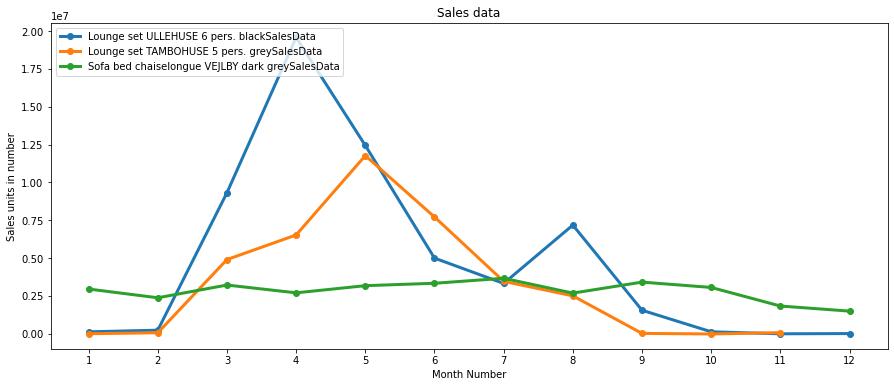

In [57]:
plt.figure(figsize = (15,6))

monthList = prod1['month'].tolist()
LoungeULLEHUSEblackSalesData = prod1['Lounge set ULLEHUSE 6 pers. black'].tolist()
LoungeTAMBOHUSEgreySalesData = prod1['Lounge set TAMBOHUSE 5 pers. grey'].tolist()
SofabedSalesData = prod1['Sofa bed chaiselongue VEJLBY dark grey'].tolist()

plt.plot(monthList, LoungeULLEHUSEblackSalesData  ,   label = 'Lounge set ULLEHUSE 6 pers. blackSalesData', marker='o', linewidth=3)
plt.plot(monthList, LoungeTAMBOHUSEgreySalesData , label = 'Lounge set TAMBOHUSE 5 pers. greySalesData', marker='o', linewidth=3)
plt.plot(monthList, SofabedSalesData, label = 'Sofa bed chaiselongue VEJLBY dark greySalesData', marker='o', linewidth=3)

plt.xlabel('Month Number')
plt.ylabel('Sales units in number')
plt.legend(loc='upper left')
plt.xticks(monthList)
#plt.yticks([50000.00, 500000.00, 1000000.00, 3000000.00 ,10000000.00, 15000000.00])
plt.title('Sales data')
plt.show()